This notebook can be used to extract data relating to coronvirus in USA from 22-Jan-2020 to Current Date.
- Extracting the data through API
- Connect to Oracle SQL
- Import data into Oracle SQL

Load all the libraries

In [1]:
import requests
import json
import pandas as pd
import iso8601
import matplotlib.pyplot as plt
import seaborn as sns

Data source: https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest

In [2]:
url = 'https://api.covid19api.com/dayone/country/united-states'
x = requests.get(url)

In [3]:
py_data = x.json()

In [4]:
py_data[10]

{'Country': 'United States of America',
 'CountryCode': 'US',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '37.09',
 'Lon': '-95.71',
 'Confirmed': 5,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 5,
 'Date': '2020-01-26T00:00:00Z'}

# Converting Json to List

In [5]:
Country = []
CountryCode = []
Province = []
City = []
CityCode = []
Lat = []
Lon = []
Confirmed = []
Deaths = []
Recovered = []
Active = []
Date = []

for r in py_data:
    try:
        Country_1 = r['Country']
    except:
        Country_1 = None
    try:
        CountryCode_1 = r['CountryCode']
    except:
        CountryCode_1 = None
    try:
        Province_1 = r['Province']
    except:
        Province_1 = None
    try:
        City_1 = r['City']
    except:
        City_1 = None
    try:
        CityCode_1 = r['CityCode']
    except:
        CityCode_1 = None
    try:
        Lat_1 = r['Lat']
    except:
        Lat_1 =None
    try:
        Lon_1 = r['Lon']
    except:
        Lon_1 = None
    try:
        Confirmed_1 = r['Confirmed']
    except:
        Confirmed_1 = None
    try:
        Deaths_1 = r['Deaths']
    except:
        Deaths_1 = None
    try:
        Recovered_1 = r['Recovered']
    except:
        Recovered_1 = None
    try:
        Active_1 = r['Active']
    except:
        Active_1 = None
    try:
        Date_1 = pd.to_datetime(r['Date'].split('T')[0], format='%Y%m%d', errors='ignore')#iso8601.parse_date(r['Date'].strftime("%Y-%m-%dT%H:%M:%SZ"))
    except:
        Date_1 = None
    #print(Country_1)#,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date)
    Country.append(Country_1)
    CountryCode.append(CountryCode_1)
    Province.append(Province_1)
    City.append(City_1)
    CityCode.append(CityCode_1)
    Lat.append(Lat_1)
    Lon.append(Lon_1)
    Confirmed.append(Confirmed_1)
    Deaths.append(Deaths_1)
    Recovered.append(Recovered_1)
    Active.append(Active_1)
    Date.append(Date_1)



# Converting List to DataFrame

In [6]:
new_data = pd.DataFrame({ 'Country':Country,
  'CountryCode':CountryCode,
  'Province':Province,
  'City':City,
  'CityCode':CityCode,
  'Lat':Lat,
  'Lon':Lon,
  'Confirmed':Confirmed,
  'Deaths':Deaths,
  'Recovered':Recovered,
  'Active':Active,
  'Date':Date,
})

In [7]:
new_data.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,United States of America,US,,,,37.09,-95.71,1,0,0,1,2020-01-22
1,United States of America,US,,,,37.09,-95.71,1,0,0,1,2020-01-23
2,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,1,2020-01-23
3,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,1,2020-01-24
4,United States of America,US,,,,37.09,-95.71,2,0,0,2,2020-01-24


In [8]:
new_data.shape

(149408, 12)

In [9]:
new_data['Date'] =pd.to_datetime(new_data['Date'])

In [10]:
new_data.dtypes

Country                object
CountryCode            object
Province               object
City                   object
CityCode               object
Lat                    object
Lon                    object
Confirmed               int64
Deaths                  int64
Recovered               int64
Active                  int64
Date           datetime64[ns]
dtype: object

# Connect to Oracle SQL

- Connect with Oracle Sql

- Create a New Table inside Oracle

- Insert Values into New Table


In [12]:
#library 
import cx_Oracle  

In [13]:
dsn_tns = cx_Oracle.makedsn(host='localhost',port=1521,service_name='xe')
conn = cx_Oracle.connect(user='system',password='hr',dsn=dsn_tns)
cur=conn.cursor()

The screenshot below shows where the information can be found in the oracle connect. 

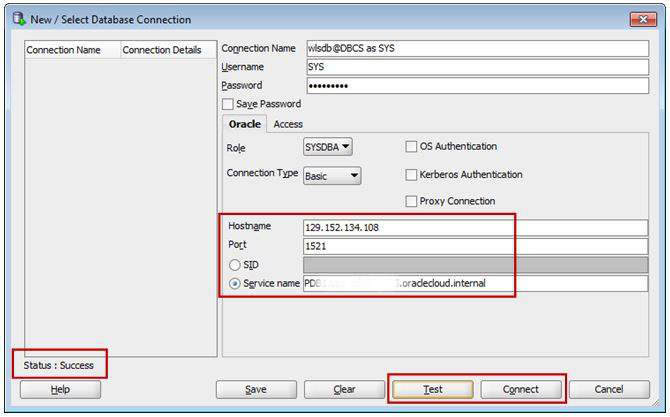

In [14]:
from IPython.display import Image
Image("Setup_oracle.png", width=800, height=800)


# Creating a new table in SQL


In [15]:
def create_table():
    sql_qul = """
    CREATE TABLE system.usa_coronavirus (
    Country  varchar2(1000),
    CountryCode  varchar2(1000),
    Province  varchar2(1000),
    City  varchar2(1000),
    CityCode  varchar2(1000),
    Lat  varchar2(1000),
    Lon  varchar2(1000),
    Confirmed  varchar2(1000),
    Deaths  varchar2(1000),
    Recovered  varchar2(1000),
    Active  varchar2(1000),
    Date_id  Timestamp

    )
    """
    try:
        cur.execute(sql_qul)
    except cx_Oracle.DatabaseError as err:
        error = err.args[0]
        if error.code ==942:
            print('Oracle error message',error.message)
            print('As Drop statement continuing')
        else:
            raise err
create_table()

# Import the data into Oracle SQL

In [16]:
def dynamic_data_entry():
    sql = 'insert into system.usa_coronavirus values(:Country,:CountryCode,:Province,:City,:CityCode,:Lat,:Lon,:Confirmed,:Deaths,:Recovered,:Active,:Date_id)'

    df_list = new_data.values.tolist()
    n =0
    for i in new_data.iterrows():
        cur.execute(sql,df_list[n])
        n +=1
dynamic_data_entry()
conn.commit()
conn.close()

## Final Result 

The Screenshot below shows how the data will look inside in sql.

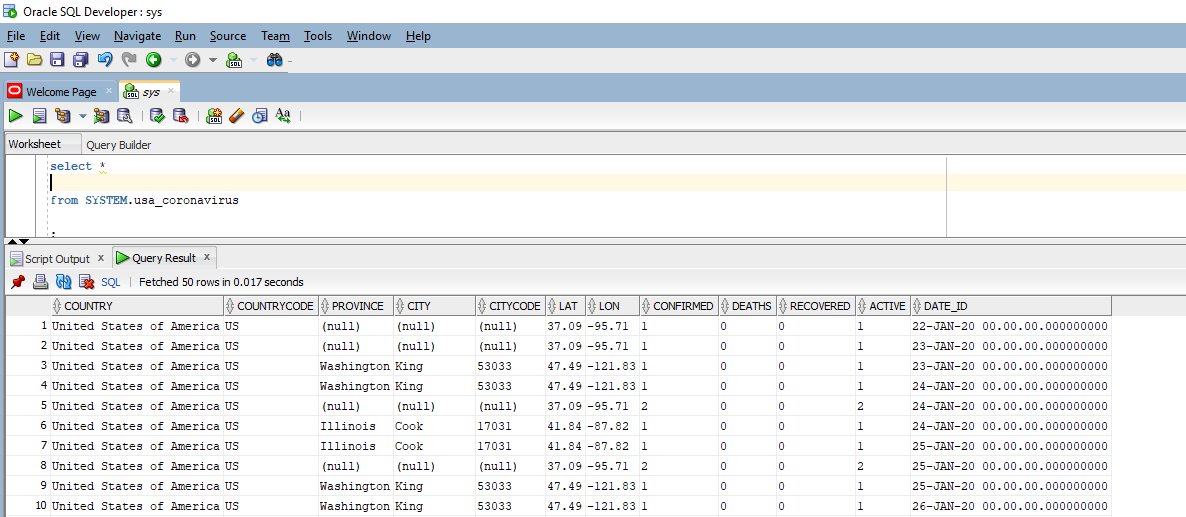

In [16]:
from IPython.display import Image
Image("SQL_TABLE.png", width=800, height=800)